### RESEARCH ON DATA FROM https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

## IMPORTED PACKAGES

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import ast
from tqdm import tqdm
import cpi
import swifter
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, MultiLabelBinarizer
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

## UTIL FUNCTIONS

In [2]:
def print_df(df):
    with pd.option_context("display.max_columns", None):
        display(df.head(5))
        
def random_color():
    return "#" + "".join(random.choice("0123456789ABCDEF") for _ in range(6))

## PREPROCESSING

- Load the dataset

In [3]:
movies_metadata_df = pd.read_csv("../../data/movies_metadata.csv", low_memory=False)
credits_df = pd.read_csv("../../data/credits.csv")

In [4]:
print_df(movies_metadata_df)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
print_df(credits_df)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


- Basic information

In [6]:
movies_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


- Drop meaningless columns

In [8]:
print_df(movies_metadata_df)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [9]:
movies_metadata_df = movies_metadata_df.drop(
    columns=["homepage", 
             "imdb_id", 
             "original_language", 
             "original_title", 
             "overview",
             "popularity",
             "poster_path",
             "spoken_languages",
             "status",
             "tagline",
             "title",
             "video",
             "vote_average",
             "vote_count"]
    )

- Column type conversion and coercion

In [10]:
movies_metadata_df["adult"] = movies_metadata_df["adult"].astype(bool)
movies_metadata_df["belongs_to_collection"] = movies_metadata_df["belongs_to_collection"].astype(str)
movies_metadata_df["budget"] = pd.to_numeric(movies_metadata_df["budget"], errors="coerce")
movies_metadata_df["genres"] = movies_metadata_df["genres"].astype(str)
movies_metadata_df["id"] = movies_metadata_df["id"].astype(str)
movies_metadata_df["production_companies"] = movies_metadata_df["production_companies"].astype(str)
movies_metadata_df["production_countries"] = movies_metadata_df["production_countries"].astype(str)
movies_metadata_df['release_date'] = pd.to_datetime(movies_metadata_df['release_date'], errors='coerce')
movies_metadata_df["revenue"] = pd.to_numeric(movies_metadata_df["revenue"], errors="coerce")
movies_metadata_df["runtime"] = pd.to_numeric(movies_metadata_df["runtime"], errors="coerce")

In [11]:
credits_df["cast"] = credits_df["cast"].astype(str)
credits_df["crew"] = credits_df["crew"].astype(str)
credits_df["id"] = credits_df["id"].astype(str)

- NA checking

In [12]:
movies_metadata_df.isna().sum()

adult                      0
belongs_to_collection      0
budget                     3
genres                     0
id                         0
production_companies       0
production_countries       0
release_date              90
revenue                    6
runtime                  263
dtype: int64

In [13]:
credits_df.isna().sum()

cast    0
crew    0
id      0
dtype: int64

- Budget and Revenue are important features, but they contain a lot of 0 values -> make NaN and drop them

In [14]:
movies_metadata_df["budget"] = movies_metadata_df["budget"].replace(0.0, np.nan)
movies_metadata_df["revenue"] = movies_metadata_df["revenue"].replace(0.0, np.nan)

- Runtime to be 0.0 which is noise, replace them with np.nan

In [15]:
movies_metadata_df["runtime"] = movies_metadata_df["runtime"].replace(0.0, np.nan)

- NaN dropping

In [16]:
movies_metadata_df =  movies_metadata_df.dropna(subset=["budget", "release_date", "revenue", "runtime"])

- Preprocess collection's name

In [17]:
def extract_collection_name(value):
    if pd.isna(value) or (value == "nan"):
        return "None"
    try:
        data = ast.literal_eval(value)
        return data.get("name") if isinstance(data, dict) else None
    except (ValueError, SyntaxError):
        return "None"

movies_metadata_df["belongs_to_collection"] = movies_metadata_df["belongs_to_collection"].apply(extract_collection_name)

- Preprocess movie's genre

In [18]:
movies_metadata_df["genres"] = movies_metadata_df["genres"].apply(ast.literal_eval)
# convert to a list of genres
movies_metadata_df['genres'] = movies_metadata_df['genres'].apply(lambda x: [d['name'] for d in x] if isinstance(x, list) else [])

- Preprocess production companies and production countries

In [19]:
def extract_pcom(com):
    if pd.isna(com) or (com == "nan"):
        return None
    
    try:
        data = ast.literal_eval(com)
        return [c for c in data] if isinstance(data, list) else None
    
    except (ValueError, SyntaxError):
        return None
    
def extract_pcoun(coun):
    if pd.isna(coun) or (coun == "nan"):
        return None
    
    try:
        data = ast.literal_eval(coun)
        return [c for c in data] if isinstance(data, list) else None
    
    except (ValueError, SyntaxError):
        return None

movies_metadata_df["production_companies"] = movies_metadata_df["production_companies"].apply(extract_pcom)
movies_metadata_df["production_countries"] = movies_metadata_df["production_countries"].apply(extract_pcoun)

- Adjust the budget and revenue due to inflation

In [20]:
tqdm.pandas()

YEAR_OF_ADJUSTMENT = 2024
MIN_YEAR = 1913

def adjust_budget(row):
    try:
        year = row["release_date"].df.year
        budget = cpi.inflate(row["budget"], year, YEAR_OF_ADJUSTMENT)
    except Exception:
        # old year, when there is no information
        # assume it starts at MIN_YEAR and do the adjustment
        budget = cpi.inflate(row["budget"], MIN_YEAR, YEAR_OF_ADJUSTMENT)
    return budget

def adjust_revenue(row):
    try:
        year = row["release_date"].df.year
        revenue = cpi.inflate(row["revenue"], year, YEAR_OF_ADJUSTMENT)
    except Exception:
        # old year, when there is no information
        # assume it starts at MIN_YEAR and do the adjustment
        revenue = cpi.inflate(row["revenue"], MIN_YEAR, YEAR_OF_ADJUSTMENT)
    return revenue

In [21]:
movies_metadata_df["budget_adj"] = movies_metadata_df.swifter.progress_bar(True).apply(adjust_budget, axis=1)

In [22]:
movies_metadata_df["revenue_adj"] = movies_metadata_df.swifter.progress_bar(True).apply(adjust_revenue, axis=1)

In [23]:
print_df(movies_metadata_df)

,adult,belongs_to_collection,budget,genres,id,production_companies,production_countries,release_date,revenue,runtime,budget_adj,revenue_adj
0,True,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",862,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,9.505727e+08,1.183634e+10
1,True,None,65000000.0,"[Adventure, Fantasy, Family]",8844,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,2.059574e+09,8.326930e+09
3,True,None,16000000.0,"[Comedy, Drama, Romance]",31357,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,5.069721e+08,2.580873e+09
5,True,None,60000000.0,"[Action, Crime, Drama, Thriller]",949,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,1.901145e+09,5.939078e+09
8,True,None,35000000.0,"[Action, Adventure, Thriller]",9091,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,1.109002e+09,2.038984e+09


In [24]:
movies_metadata_df["budget"] = movies_metadata_df["budget_adj"]
movies_metadata_df["revenue"] = movies_metadata_df["revenue_adj"]
movies_metadata_df = movies_metadata_df.drop(columns=["budget_adj", "revenue_adj"])

- Dataframe merging

In [25]:
df = pd.merge(left=movies_metadata_df, right=credits_df, on="id", how="left")

- Make movies which contain no cast or no crew (noise in data) as NaN

In [26]:
df["cast"] = df["cast"].replace("[]", np.nan)
df["crew"] = df["crew"].replace("[]", np.nan)

- Drop NaN values

In [27]:
df = df.dropna(subset=["cast", "crew"])

- Preprocess cast and crew to list of dict

In [28]:
def extract_cast(cast):
    if pd.isna(cast) or (cast == "nan"):
        return None
    
    try:
        data = ast.literal_eval(cast)
        return [c for c in data] if isinstance(data, list) else None
    
    except (ValueError, SyntaxError):
        return None
    
def extract_crew(crew):
    if pd.isna(crew) or (crew == "nan"):
        return None
    
    try:
        data = ast.literal_eval(crew)
        return [c for c in data] if isinstance(data, list) else None
    
    except (ValueError, SyntaxError):
        return None

df["cast"] = df["cast"].apply(extract_cast)
df["crew"] = df["crew"].apply(extract_crew)

- Final dataframe

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5369 entries, 0 to 5380
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  5369 non-null   bool          
 1   belongs_to_collection  5369 non-null   object        
 2   budget                 5369 non-null   float64       
 3   genres                 5369 non-null   object        
 4   id                     5369 non-null   object        
 5   production_companies   5369 non-null   object        
 6   production_countries   5369 non-null   object        
 7   release_date           5369 non-null   datetime64[ns]
 8   revenue                5369 non-null   float64       
 9   runtime                5369 non-null   float64       
 10  cast                   5369 non-null   object        
 11  crew                   5369 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(3), object(7)
memory usage: 

In [35]:
print_df(df)

,adult,belongs_to_collection,budget,genres,id,production_companies,production_countries,release_date,revenue,runtime,cast,crew
0,True,Toy Story Collection,9.505727e+08,"[Animation, Comedy, Family]",862,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,1.183634e+10,81.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,True,None,2.059574e+09,"[Adventure, Fantasy, Family]",8844,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,8.326930e+09,104.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,True,None,5.069721e+08,"[Comedy, Drama, Romance]",31357,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,2.580873e+09,127.0,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
3,True,None,1.901145e+09,"[Action, Crime, Drama, Thriller]",949,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,5.939078e+09,170.0,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de..."
4,True,None,1.109002e+09,"[Action, Adventure, Thriller]",9091,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,2.038984e+09,106.0,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de..."


- Cache preprocessed data

In [31]:
df.to_pickle("./cache/preprocessed.pkl")

In [32]:
df = pd.read_pickle("./cache/preprocessed.pkl")

## FEATURE ENGINEERING
- Feature engineering is a broad conceptual process that involves creating, transforming, or selecting the right features (variables) from raw data to improve the performance of a machine learning model
- It’s about deciding what information the model should see - and how it should be represented

#### MORE FEATURES

In [36]:
def more_features(df):
    df = df.copy()
    # 1. Does this movie belong to a collection?
    df["is_collection"] = df["belongs_to_collection"].apply(lambda x: False if x == "None" else True)
    
    # 6. What is the number of production companies to produce the movie?
    df["num_companies"] = df["production_companies"].apply(lambda x: len(x))
    
    # 7. What is the number of production countries to produce the movie?
    df["num_countries"] = df["production_countries"].apply(lambda x: len(x))
    
    # 2. Was this movie produced on Friday?
    df["is_friday"] = (df["release_date"].dt.weekday == 4)
    
    # 3. What is this movie's cast number?
    df["num_cast"] = df["cast"].apply(lambda x: len(x))
    
    # 4. What is this movie's crew number?
    df["num_crew"] = df["crew"].apply(lambda x: len(x))
    
    # 5. What is the actor/actress ratio of the movie?
    def extract_actress_ratio(cast):
        total = len(cast)
        actress_num = sum(1 for c in cast if c.get("gender") == 1)
        return actress_num / total
    
    df["actress_ratio"] = df["cast"].apply(extract_actress_ratio)
    
    return df

In [37]:
more_features_df = more_features(df)

In [39]:
print_df(more_features_df)

,adult,belongs_to_collection,budget,genres,id,production_companies,production_countries,release_date,revenue,runtime,cast,crew,is_collection,num_companies,num_countries,is_friday,num_cast,num_crew,actress_ratio
0,True,Toy Story Collection,9.505727e+08,"[Animation, Comedy, Family]",862,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,1.183634e+10,81.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",True,1,1,False,13,106,0.230769
1,True,None,2.059574e+09,"[Adventure, Fantasy, Family]",8844,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,8.326930e+09,104.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",False,3,1,True,26,16,0.230769
2,True,None,5.069721e+08,"[Comedy, Drama, Romance]",31357,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,2.580873e+09,127.0,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",False,1,1,True,10,10,0.400000
3,True,None,1.901145e+09,"[Action, Crime, Drama, Thriller]",949,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,5.939078e+09,170.0,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",False,3,1,True,65,71,0.230769
4,True,None,1.109002e+09,"[Action, Adventure, Thriller]",9091,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,2.038984e+09,106.0,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...",False,3,1,True,6,9,0.166667


#### FINAL DATAFRAME FOR MODEL TRANING

In [42]:
data = more_features_df.drop(columns=[
    "belongs_to_collection", 
    "id", 
    "production_companies", 
    "production_countries",
    "release_date",
    "cast",
    "crew",])

##### MODEL'S DATA EXPECTATION

In [46]:
print_df(data)

,adult,budget,genres,revenue,runtime,is_collection,num_companies,num_countries,is_friday,num_cast,num_crew,actress_ratio
0,True,9.505727e+08,"[Animation, Comedy, Family]",1.183634e+10,81.0,True,1,1,False,13,106,0.230769
1,True,2.059574e+09,"[Adventure, Fantasy, Family]",8.326930e+09,104.0,False,3,1,True,26,16,0.230769
2,True,5.069721e+08,"[Comedy, Drama, Romance]",2.580873e+09,127.0,False,1,1,True,10,10,0.400000
3,True,1.901145e+09,"[Action, Crime, Drama, Thriller]",5.939078e+09,170.0,False,3,1,True,65,71,0.230769
4,True,1.109002e+09,"[Action, Adventure, Thriller]",2.038984e+09,106.0,False,3,1,True,6,9,0.166667


## MODEL TRAINING

- Train/test splitting

In [71]:
X = data.drop(columns=["revenue"])
y = data["revenue"]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)

- Define the features to apply the pipeline

In [91]:
numeric_features = [
    "budget", 
    "runtime",
    "num_companies",
    "num_countries",
    "num_cast",
    "num_crew",
    "actress_ratio"
    ]

boolean_features = [
    "adult",
    "is_collection",
    "is_friday"
    ]

categorical_features = [
    "genres",
    ]

- Define the preprocess pipeline (to apply with both the train set and test set also new data for inference)

In [92]:
class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        # X might be a DataFrame or 2D array -> flatten to 1D list
        self.mlb.fit(X.iloc[:, 0] if hasattr(X, "iloc") else X.ravel())
        return self

    def transform(self, X):
        X = X.iloc[:, 0] if hasattr(X, "iloc") else X.ravel()
        return self.mlb.transform(X)

    def get_feature_names_out(self, input_features=None):
        return self.mlb.classes_

In [93]:
numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

boolean_transformer = Pipeline([
    ("bool_to_int", FunctionTransformer(lambda x: x.astype(int)))
])

# categorical_transformer = Pipeline([
#     ("encoder", OneHotEncoder(handle_unknown="ignore"))
# ])

multilabel_transformer = Pipeline([
    ("binarizer", MultiLabelBinarizerTransformer())
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("bool", boolean_transformer, boolean_features),
    ("cat", multilabel_transformer, categorical_features)
])

- Define the model pipeline

In [94]:
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

- Model training

In [95]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## MODEL EVALUATION

- R2 score

In [96]:
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(r2)

0.6325434699930492


- Residual plot

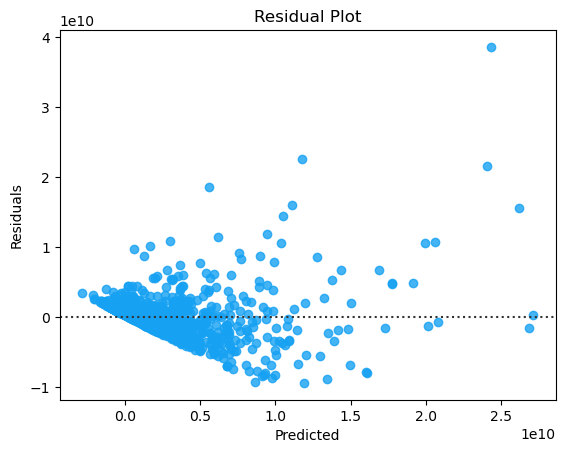

In [97]:
sns.residplot(x=y_pred, y=y_test - y_pred, color=random_color())

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

## NOTES
- If a value like 0.0 is considered to be noise or invalid data collection, use replace() to replace them with np.nan, and then drop them gracefully
- Concept of feature engineering and pipeline
- New features derivation can be added to the pipeline?

### AUTHOR
- LE BUI TRUNG DUNG